In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
from sentence_transformers import SentenceTransformer
import faiss
from collections import Counter

In [3]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
movies.shape

(4803, 20)

In [7]:
credits.shape

(4803, 4)

In [8]:
movies = movies.merge(credits, on="title")
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [9]:
movies.shape

(4809, 23)

In [10]:
movies = movies[["movie_id","title","overview","genres","keywords","cast","crew"]]
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [11]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [12]:
movies = movies.copy()
movies.dropna(inplace=True)

In [13]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [14]:
movies.duplicated().sum()

np.int64(0)

In [15]:
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [16]:
import ast

In [17]:
def convert(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i["name"])
    return l

In [18]:
movies['genres'] = movies['genres'].apply(convert)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [19]:
movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

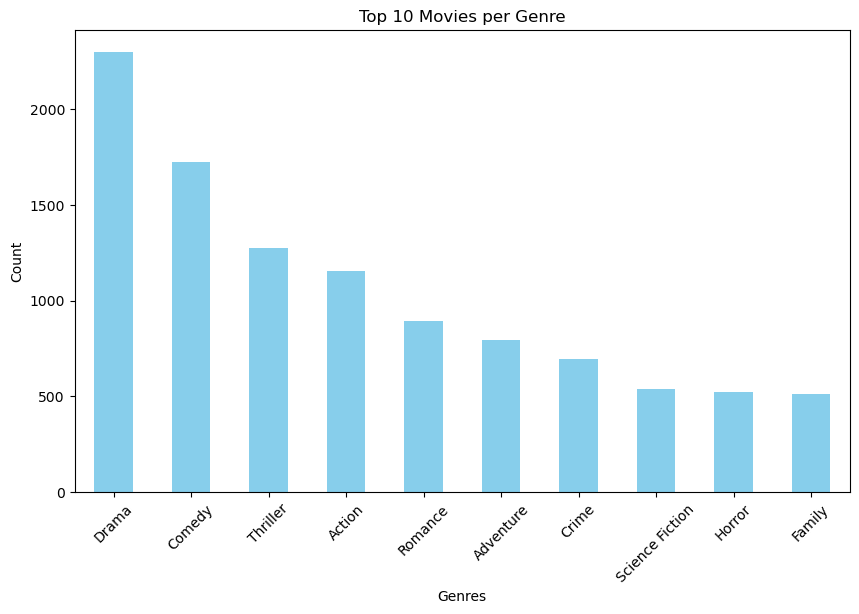

In [20]:
all_genres = sum(movies['genres'], [])
genre_count = pd.Series(all_genres).value_counts()
plt.figure(figsize=(10,6))
genre_count[:10].plot(kind='bar', color="skyblue")
plt.title("Top 10 Movies per Genre")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [21]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


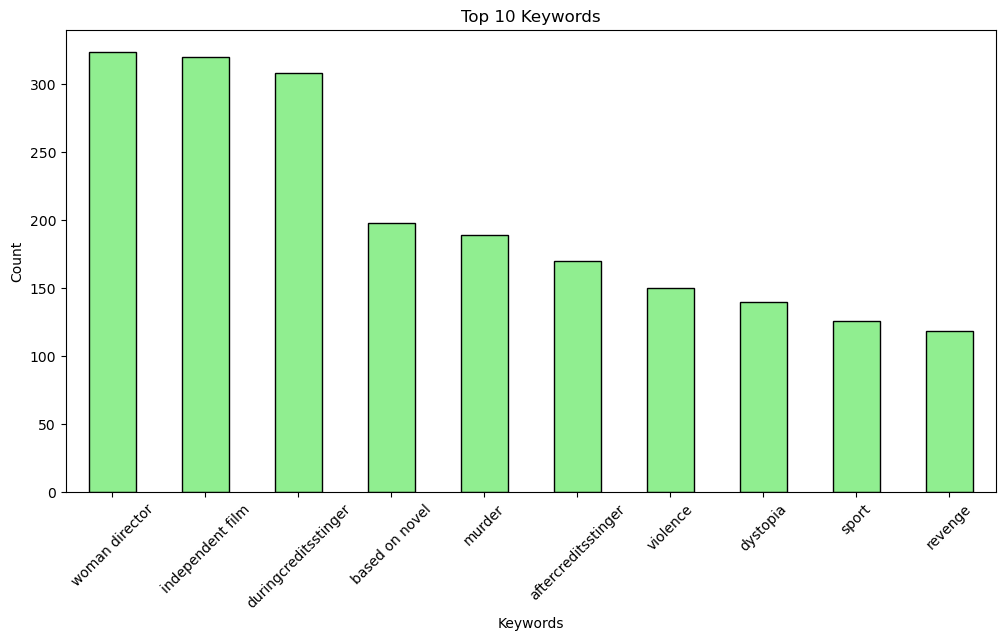

In [22]:
all_keywords = sum(movies['keywords'], [])
keyword_count = pd.Series(all_keywords).value_counts()

plt.figure(figsize=(12,6))
keyword_count[:10].plot(kind='bar', color="lightgreen", edgecolor="black")
plt.title("Top 10 Keywords")
plt.xlabel("Keywords")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [23]:
def convert_cast(text):
    l = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            l.append(i["name"])
        counter +=1
    return l

In [24]:
movies['cast'] = movies['cast'].apply(convert)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [25]:
movies.columns

Index(['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew'], dtype='object')

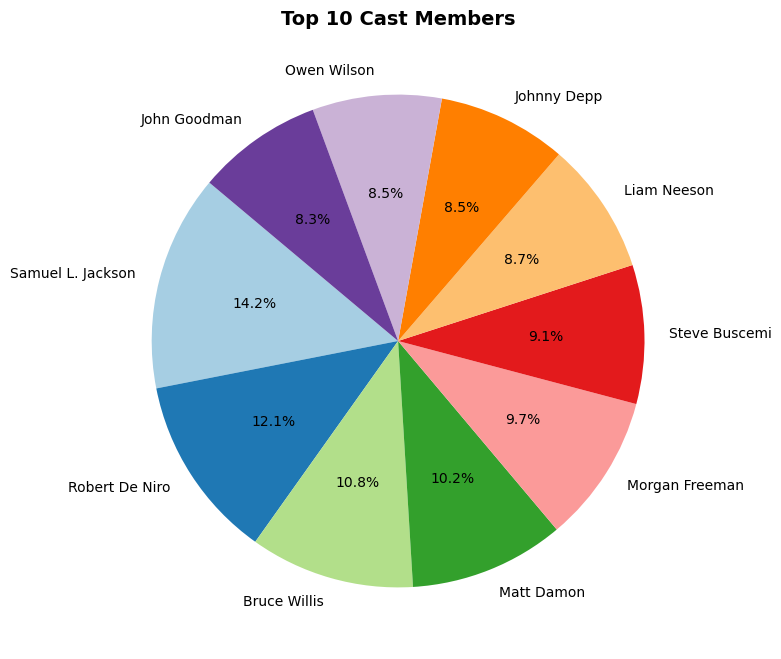

In [26]:
all_cast = sum(movies['cast'], [])
cast_count = pd.Series(all_cast).value_counts()

top_cast = cast_count[:10]

plt.figure(figsize=(8,8))
plt.pie(
    top_cast,
    labels=top_cast.index,
    autopct="%1.1f%%",   
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title("Top 10 Cast Members", fontsize=14, fontweight="bold")
plt.show()

In [27]:
movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [28]:
def fectch_director(text):
    l = []
    for i in ast.literal_eval(text):
        if i['job']=='Director':
            l.append(i["name"])
            break
    return l

In [29]:
movies['crew'] = movies['crew'].apply(fectch_director)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]


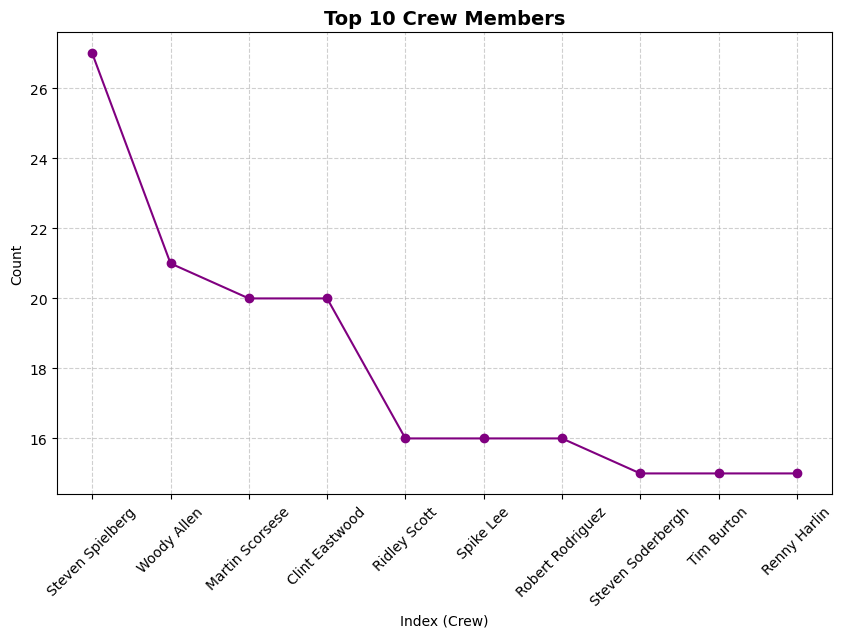

In [30]:
all_crew = sum(movies['crew'], [])

crew_count = pd.Series(all_crew).value_counts()

plt.figure(figsize=(10,6))
crew_count[:10].plot(kind='line', marker='o', color="purple")

plt.title("Top 10 Crew Members", fontsize=14, fontweight="bold")
plt.xlabel("Index (Crew)")
plt.ylabel("Count")
plt.xticks(range(10), crew_count[:10].index, rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [31]:
movies.iloc[0]['overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [32]:
movies['overview']=movies['overview'].apply(lambda x:x.split( ))
movies.head(10)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]
5,559,Spider-Man 3,"[The, seemingly, invincible, Spider-Man, goes,...","[Fantasy, Action, Adventure]","[dual identity, amnesia, sandstorm, love of on...","[Tobey Maguire, Kirsten Dunst, James Franco, T...",[Sam Raimi]
6,38757,Tangled,"[When, the, kingdom's, most, wanted-and, most,...","[Animation, Family]","[hostage, magic, horse, fairy tale, musical, p...","[Zachary Levi, Mandy Moore, Donna Murphy, Ron ...",[Byron Howard]
7,99861,Avengers: Age of Ultron,"[When, Tony, Stark, tries, to, jumpstart, a, d...","[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero, based on com...","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon]
8,767,Harry Potter and the Half-Blood Prince,"[As, Harry, begins, his, sixth, year, at, Hogw...","[Adventure, Fantasy, Family]","[witch, magic, broom, school of witchcraft, wi...","[Daniel Radcliffe, Rupert Grint, Emma Watson, ...",[David Yates]
9,209112,Batman v Superman: Dawn of Justice,"[Fearing, the, actions, of, a, god-like, Super...","[Action, Adventure, Fantasy]","[dc comics, vigilante, superhero, based on com...","[Ben Affleck, Henry Cavill, Gal Gadot, Amy Ada...",[Zack Snyder]


In [33]:
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [34]:
#Sam Worthington
#SamWorthington
def remove_space(word):
    l=[]
    for i in word:
        l.append(i.replace(" ", ""))
    return l

In [35]:
movies['cast'] = movies['cast'].apply(remove_space)
movies['crew'] = movies['crew'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]


In [36]:
# 🧹 Step 1: Missing value handle
movies['overview'] = movies['overview'].fillna('')

# 🧩 Step 2: Safe converter function
def ensure_string(x):
    if isinstance(x, list):
        return " ".join(map(str, x))
    elif isinstance(x, str):
        return x
    else:
        return ""

# 🧩 Step 3: Apply on all columns
for col in ['genres', 'keywords', 'cast', 'crew']:
    movies[col] = movies[col].apply(ensure_string)

# 🧩 Step 4: Now safely concatenate all
movies['tags'] = (
    movies['overview'].astype(str) + " " +
    movies['genres'].astype(str) + " " +
    movies['keywords'].astype(str) + " " +
    movies['cast'].astype(str) + " " +
    movies['crew'].astype(str)
)


In [37]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",Action Adventure Fantasy ScienceFiction,cultureclash future spacewar spacecolony socie...,SamWorthington ZoeSaldana SigourneyWeaver Step...,JamesCameron,"['In', 'the', '22nd', 'century,', 'a', 'parapl..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",Adventure Fantasy Action,ocean drugabuse exoticisland eastindiatradingc...,JohnnyDepp OrlandoBloom KeiraKnightley Stellan...,GoreVerbinski,"['Captain', 'Barbossa,', 'long', 'believed', '..."


In [38]:
movies.iloc[0]['tags']

"['In', 'the', '22nd', 'century,', 'a', 'paraplegic', 'Marine', 'is', 'dispatched', 'to', 'the', 'moon', 'Pandora', 'on', 'a', 'unique', 'mission,', 'but', 'becomes', 'torn', 'between', 'following', 'orders', 'and', 'protecting', 'an', 'alien', 'civilization.'] Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver StephenLang MichelleRodriguez GiovanniRibisi JoelDavidMoore CCHPounder WesStudi LazAlonso DileepRao MattGerald SeanAnthonyMoran JasonWhyte ScottLawrence KellyKilgour JamesPatrickPitt SeanPatrickMurphy PeterDillon KevinDorman KelsonHenderson DavidVanHorn JacobTomuri MichaelBlain-Rozgay JonCurry LukeHawker WoodySchultz PeterMensah SoniaYee JahnelCurfman IlramChoi KylaWarren LisaRoumain DebraWilson ChrisMala TaylorKibby JodieLandau JulieLamm CullenB.Madden JosephBradyMa

In [39]:
new_df=movies[['movie_id','title','tags']]

In [40]:
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"['In', 'the', '22nd', 'century,', 'a', 'parapl..."
1,285,Pirates of the Caribbean: At World's End,"['Captain', 'Barbossa,', 'long', 'believed', '..."


In [41]:
new_df['tags']=new_df['tags'].apply( lambda x: " ".join(x))

C:\Users\ruhul\AppData\Local\Temp\ipykernel_16172\1100149079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply( lambda x: " ".join(x))


In [42]:
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"[ ' I n ' , ' t h e ' , ' 2 2 n d ' , ' ..."
1,285,Pirates of the Caribbean: At World's End,"[ ' C a p t a i n ' , ' B a r b o s s a , ' ..."


In [43]:
new_df.iloc[0]['tags']

"[ ' I n ' ,   ' t h e ' ,   ' 2 2 n d ' ,   ' c e n t u r y , ' ,   ' a ' ,   ' p a r a p l e g i c ' ,   ' M a r i n e ' ,   ' i s ' ,   ' d i s p a t c h e d ' ,   ' t o ' ,   ' t h e ' ,   ' m o o n ' ,   ' P a n d o r a ' ,   ' o n ' ,   ' a ' ,   ' u n i q u e ' ,   ' m i s s i o n , ' ,   ' b u t ' ,   ' b e c o m e s ' ,   ' t o r n ' ,   ' b e t w e e n ' ,   ' f o l l o w i n g ' ,   ' o r d e r s ' ,   ' a n d ' ,   ' p r o t e c t i n g ' ,   ' a n ' ,   ' a l i e n ' ,   ' c i v i l i z a t i o n . ' ]   A c t i o n   A d v e n t u r e   F a n t a s y   S c i e n c e F i c t i o n   c u l t u r e c l a s h   f u t u r e   s p a c e w a r   s p a c e c o l o n y   s o c i e t y   s p a c e t r a v e l   f u t u r i s t i c   r o m a n c e   s p a c e   a l i e n   t r i b e   a l i e n p l a n e t   c g i   m a r i n e   s o l d i e r   b a t t l e   l o v e a f f a i r   a n t i w a r   p o w e r r e l a t i o n s   m i n d a n d s o u l   3 d   S a m W o r t h i n g t o n

In [44]:
new_df['tags']=new_df['tags'].apply( lambda x:x.lower())

C:\Users\ruhul\AppData\Local\Temp\ipykernel_16172\240084139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply( lambda x:x.lower())


In [45]:
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"[ ' i n ' , ' t h e ' , ' 2 2 n d ' , ' ..."
1,285,Pirates of the Caribbean: At World's End,"[ ' c a p t a i n ' , ' b a r b o s s a , ' ..."


In [46]:
new_df.iloc[0]['tags']

"[ ' i n ' ,   ' t h e ' ,   ' 2 2 n d ' ,   ' c e n t u r y , ' ,   ' a ' ,   ' p a r a p l e g i c ' ,   ' m a r i n e ' ,   ' i s ' ,   ' d i s p a t c h e d ' ,   ' t o ' ,   ' t h e ' ,   ' m o o n ' ,   ' p a n d o r a ' ,   ' o n ' ,   ' a ' ,   ' u n i q u e ' ,   ' m i s s i o n , ' ,   ' b u t ' ,   ' b e c o m e s ' ,   ' t o r n ' ,   ' b e t w e e n ' ,   ' f o l l o w i n g ' ,   ' o r d e r s ' ,   ' a n d ' ,   ' p r o t e c t i n g ' ,   ' a n ' ,   ' a l i e n ' ,   ' c i v i l i z a t i o n . ' ]   a c t i o n   a d v e n t u r e   f a n t a s y   s c i e n c e f i c t i o n   c u l t u r e c l a s h   f u t u r e   s p a c e w a r   s p a c e c o l o n y   s o c i e t y   s p a c e t r a v e l   f u t u r i s t i c   r o m a n c e   s p a c e   a l i e n   t r i b e   a l i e n p l a n e t   c g i   m a r i n e   s o l d i e r   b a t t l e   l o v e a f f a i r   a n t i w a r   p o w e r r e l a t i o n s   m i n d a n d s o u l   3 d   s a m w o r t h i n g t o n

In [47]:
new_df.shape

(4806, 3)

In [48]:
import nltk
from nltk.stem import PorterStemmer

In [49]:
ps = PorterStemmer()

In [50]:
def stems(text):
    l=[]
    for i in text.split():
        l.append(ps.stem(i))
    return " ".join(l)

In [51]:
new_df['tags']=new_df['tags'].apply(stems)

C:\Users\ruhul\AppData\Local\Temp\ipykernel_16172\1522715013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stems)


In [52]:
new_df.iloc[0]['tags']

"[ ' i n ' , ' t h e ' , ' 2 2 n d ' , ' c e n t u r y , ' , ' a ' , ' p a r a p l e g i c ' , ' m a r i n e ' , ' i s ' , ' d i s p a t c h e d ' , ' t o ' , ' t h e ' , ' m o o n ' , ' p a n d o r a ' , ' o n ' , ' a ' , ' u n i q u e ' , ' m i s s i o n , ' , ' b u t ' , ' b e c o m e s ' , ' t o r n ' , ' b e t w e e n ' , ' f o l l o w i n g ' , ' o r d e r s ' , ' a n d ' , ' p r o t e c t i n g ' , ' a n ' , ' a l i e n ' , ' c i v i l i z a t i o n . ' ] a c t i o n a d v e n t u r e f a n t a s y s c i e n c e f i c t i o n c u l t u r e c l a s h f u t u r e s p a c e w a r s p a c e c o l o n y s o c i e t y s p a c e t r a v e l f u t u r i s t i c r o m a n c e s p a c e a l i e n t r i b e a l i e n p l a n e t c g i m a r i n e s o l d i e r b a t t l e l o v e a f f a i r a n t i w a r p o w e r r e l a t i o n s m i n d a n d s o u l 3 d s a m w o r t h i n g t o n z o e s a l d a n a s i g o u r n e y w e a v e r s t e p h e n l a n g m i c h e l l e r o d r i g u e z

In [53]:
model = SentenceTransformer('all-MiniLM-L6-v2', cache_folder='./models')


In [54]:
movie_embeddings = model.encode(new_df['tags'].tolist(), convert_to_numpy=True, show_progress_bar=True)


Batches:   0%|          | 0/151 [00:00<?, ?it/s]

In [55]:
movie_embeddings = np.array(movie_embeddings).astype('float32')
faiss.normalize_L2(movie_embeddings)


In [56]:
index = faiss.IndexFlatIP(movie_embeddings.shape[1])  
index.add(movie_embeddings)
print("FAISS index built successfully ✅")

FAISS index built successfully ✅


In [57]:
def recommend(movie_title, top_n=5):
    if movie_title not in new_df['title'].values:
        print("Movie not found.")
        return []
    
    movie_idx = new_df[new_df['title'] == movie_title].index[0]
    query_vec = movie_embeddings[movie_idx].reshape(1, -1)
    
    # normalize query
    faiss.normalize_L2(query_vec)
    
    D, I = index.search(query_vec, top_n + 1)
    
    recommended_movies = []
    for sim, idx in zip(D[0][1:], I[0][1:]):
        accuracy_percent = round(float(sim) * 100, 2)  
        recommended_movies.append({
            'title': new_df.iloc[idx].title,
            'accuracy_percent': accuracy_percent
        })
    
    return recommended_movies


In [61]:
movie_name = "John Carter"
print(f"🎬 Recommended movies for '{movie_name}':")
print(recommend(movie_name, top_n=5))

🎬 Recommended movies for 'John Carter':
[{'title': 'Shaft', 'accuracy_percent': 98.84}, {'title': 'Stake Land', 'accuracy_percent': 98.82}, {'title': 'Zoom', 'accuracy_percent': 98.76}, {'title': 'American Ninja 2: The Confrontation', 'accuracy_percent': 98.76}, {'title': 'Kissing Jessica Stein', 'accuracy_percent': 98.75}]


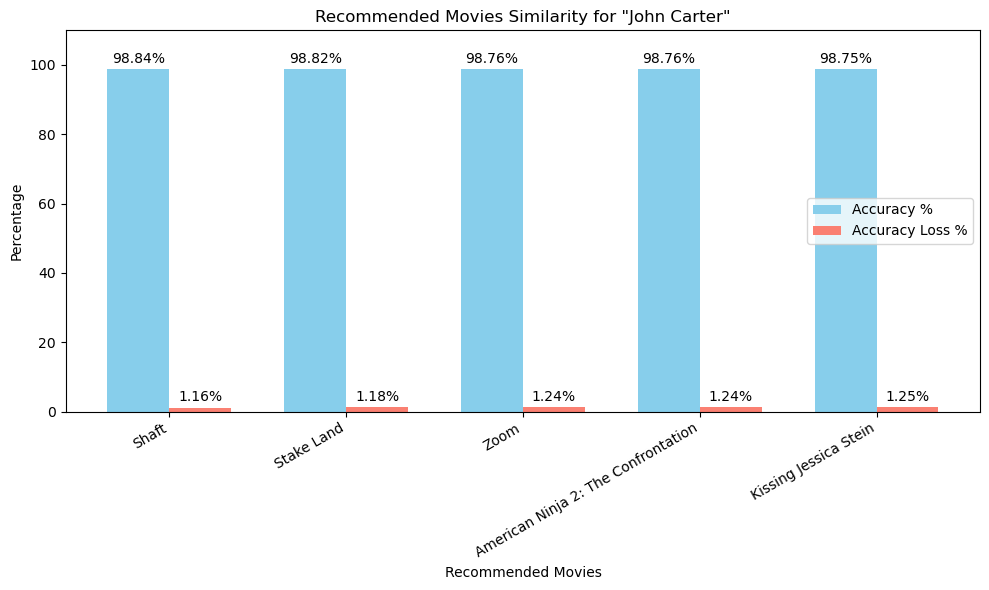

In [62]:
movie_name = "John Carter"
recommended_movies = recommend(movie_name, top_n=5)

# Extract titles and accuracies
titles = [m['title'] for m in recommended_movies]
accuracies = [m['accuracy_percent'] for m in recommended_movies]

# Calculate accuracy loss (difference from 100%)
accuracy_loss = [100 - a for a in accuracies]

# Create bar chart
x = np.arange(len(titles))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy %', color='skyblue')
bars2 = ax.bar(x + width/2, accuracy_loss, width, label='Accuracy Loss %', color='salmon')

# Add text labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', va='bottom')

# Chart formatting
ax.set_xlabel('Recommended Movies')
ax.set_ylabel('Percentage')
ax.set_title(f'Recommended Movies Similarity for "{movie_name}"')
ax.set_xticks(x)
ax.set_xticklabels(titles, rotation=30, ha='right')
ax.legend()
ax.set_ylim(0, 110)  # leave space for text labels

plt.tight_layout()
plt.show()

In [60]:
movie_embeddings

array([[-0.05601819, -0.04562534,  0.02944041, ...,  0.06442901,
         0.04991033, -0.03172349],
       [-0.0686094 , -0.0238579 ,  0.03157764, ...,  0.07311451,
         0.04766073, -0.01705048],
       [-0.0531994 , -0.05210309,  0.0239676 , ...,  0.06410082,
         0.04666048, -0.02795643],
       ...,
       [-0.05878743, -0.03823901,  0.03900281, ...,  0.06177924,
         0.0706738 , -0.03732713],
       [-0.04355052, -0.04260106,  0.0355556 , ...,  0.05414997,
         0.04779601, -0.03447992],
       [-0.06735506, -0.04432984,  0.01578044, ...,  0.07060969,
         0.03570484, -0.01354907]], dtype=float32)

In [200]:
new_df

,movie_id,title,tags
0,19995,Avatar,"[ ' i n ' , ' t h e ' , ' 2 2 n d ' , ' c e n ..."
1,285,Pirates of the Caribbean: At World's End,"[ ' c a p t a i n ' , ' b a r b o s s a , ' , ..."
2,206647,Spectre,"[ ' a ' , ' c r y p t i c ' , ' m e s s a g e ..."
3,49026,The Dark Knight Rises,"[ ' f o l l o w i n g ' , ' t h e ' , ' d e a ..."
4,49529,John Carter,"[ ' j o h n ' , ' c a r t e r ' , ' i s ' , ' ..."
...,...,...,...
4804,9367,El Mariachi,"[ ' e l ' , ' m a r i a c h i ' , ' j u s t ' ..."
4805,72766,Newlyweds,"[ ' a ' , ' n e w l y w e d ' , "" c o u p l e ..."
4806,231617,"Signed, Sealed, Delivered","[ ' "" s i g n e d , ' , ' s e a l e d , ' , ' ..."
4807,126186,Shanghai Calling,"[ ' w h e n ' , ' a m b i t i o u s ' , ' n e ..."


In [202]:
index

<faiss.swigfaiss_avx2.IndexFlatIP; proxy of <Swig Object of type 'faiss::IndexFlatIP *' at 0x000001C9C4CED350> >

In [203]:
import pickle
if not os.path.exists('artificats'):
    os.makedirs('artificats')
pickle.dump(new_df, open('artificats/movie_list.pkl', 'wb'))
pickle.dump(movie_embeddings, open('artificats/similarity.pkl', 'wb'))